In [1]:
import pickle
import numpy as np
import pandas as pd
from skimage import color
from sklearn.svm import SVC
from skimage import exposure
from skimage.feature import hog
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
Xtr=np.loadtxt("TrainData.csv")
Ytr=np.loadtxt("TrainLabels.csv")
print(Xtr.shape)
print(Ytr.shape)

(12000, 784)
(12000,)


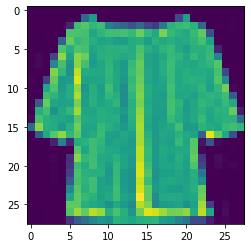

In [3]:
plt.imshow(Xtr[0].reshape([28, 28]))

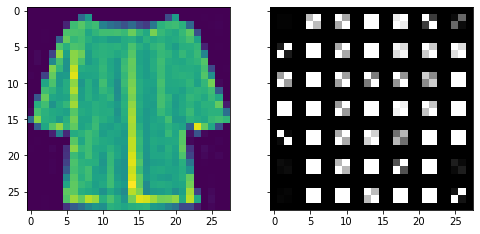

In [4]:
img = Xtr[0].reshape([28,28])
fd, hog_image = hog(img, orientations=8, pixels_per_cell=(4, 4), 
          cells_per_block=(1, 1), visualize=True, multichannel=None)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True) 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax1.imshow(img) 
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
plt.show()

In [5]:
def get_hog_features(imgs, hog_features, hog_images):
    divider = 1000
    for i in range(imgs.shape[0]):
        img = imgs[i].reshape([28,28])
#         img = resize(img, (128,64))
        fd, hog_image = hog(img, orientations=8, pixels_per_cell=(4, 4), 
                   cells_per_block=(1, 1), visualize=True, multichannel=None)
        hog_features.append(fd)
        hog_images.append(hog_image)
        if (i+1)/divider==1:
            divider+=1000
            print('*', end='')
    print('Done!')

In [6]:
hog_features = []
hog_images = []
get_hog_features(Xtr, hog_features, hog_images)
hog_features = np.array(hog_features)
print(hog_features.shape)

************Done!
(12000, 392)


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(hog_features, Ytr, test_size=0.15, random_state=42)
print('X Train : ', X_train.shape)
print('Y Train : ', Y_train.shape)
print('X Test : ', X_test.shape)
print('Y Test : ', Y_test.shape)

X Train :  (10200, 392)
Y Train :  (10200,)
X Test :  (1800, 392)
Y Test :  (1800,)


#  SVC Model

In [8]:
model1 = SVC()
model1.fit(X_train, Y_train)

SVC()

In [9]:
pickle.dump(model1, open('SVC_Model.sav', 'wb'))

In [10]:
model_SVC = pickle.load(open('SVC_Model.sav', 'rb'))
y_pre = model_SVC.predict(X_test)
print(accuracy_score(y_pre, Y_test)*100)
print('')
print(confusion_matrix(y_pre, Y_test))
print('')
print(classification_report(y_pre, Y_test))

81.38888888888889

[[705 152]
 [183 760]]

              precision    recall  f1-score   support

        -1.0       0.79      0.82      0.81       857
         1.0       0.83      0.81      0.82       943

    accuracy                           0.81      1800
   macro avg       0.81      0.81      0.81      1800
weighted avg       0.81      0.81      0.81      1800



#  GaussianNB Model

In [11]:
model3 = GaussianNB()
model3.fit(X_train, Y_train)

GaussianNB()

In [12]:
pickle.dump(model3, open('GaussianNB_Model.sav', 'wb'))

In [13]:
model_GaussianNB = pickle.load(open('GaussianNB_Model.sav', 'rb'))
y_pre = model_GaussianNB.predict(X_test)
print(accuracy_score(y_pre, Y_test)*100)
print('')
print(confusion_matrix(y_pre, Y_test))
print('')
print(classification_report(y_pre, Y_test))

75.3888888888889

[[606 161]
 [282 751]]

              precision    recall  f1-score   support

        -1.0       0.68      0.79      0.73       767
         1.0       0.82      0.73      0.77      1033

    accuracy                           0.75      1800
   macro avg       0.75      0.76      0.75      1800
weighted avg       0.76      0.75      0.76      1800

